# DBSCAN

Il DBSCAN (*Density-based spatial clustering of applications with noise*) è un algoritmo di clustering che offre alcuni vantaggi rispetto al K-means e al Clustering Gerarchico:
1. Non serve definire il numero di cluster
2. E' molto resistente agli outlier
3. Crea cluster non solo di forma sferica
Per utilizzare il DBSCAN bisogna definire il valore di due nuovi parametri:
1. **Eps**: la distanza massima tra due osservazioni appartenenti ad uno stesso cluster
2. **minPts**: il numero minimo di osservazioni richieste per formare un cluster

In questo notebook vedremo un esempio di clustering in cui il DBSCAN perfoma notevolmente meglio di K-means e Clustering Gerarchico Agglomerativo.
Importiamo le librerie necessarie.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons

sns.set()

Utilizziamo la funzione make_moons di sklearn per creare un dataset rappresentato da due semicerchi.

<function matplotlib.pyplot.show>

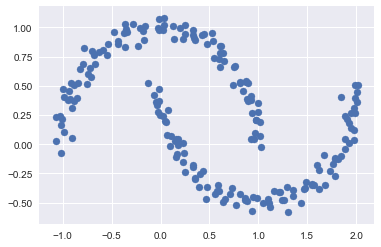

In [47]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.scatter(X[:,0],X[:,1])
plt.show

Questo tipo di dataset è impossibile da dividere in clustering per K-means e Clustering Gerarchico, perché questi algoritmi riescono a creare cluster unicamente di forma sferica, vediamolo.

## K-means

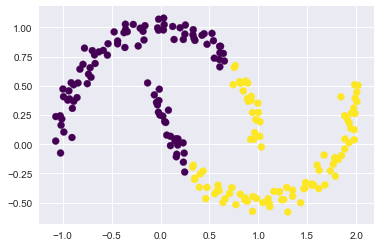

In [40]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=2)
km.fit(X)
y_km = km.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_km,cmap='viridis')
plt.show()

## Clustering Gerarchico Agglomerativo

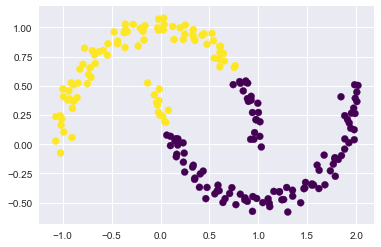

In [38]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2, linkage="complete")
y_ac = ac.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_ac,cmap='viridis')
plt.show()

## DBSCAN
Adesso proviamo con il DBSCAN, come già precisato qui non serve specificare il numero di cluster, ma dobbiamo definire i valori di **eps** e **minPts**.

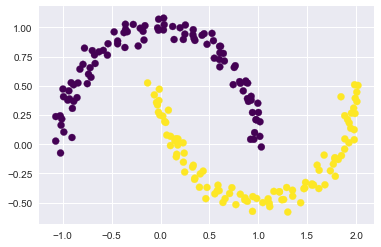

In [52]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.25, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_dbscan,cmap='viridis')
#core_pts = dbscan.components_
#plt.scatter(x=core_pts[:, 0], y=core_pts[:, 1], c='red', s=200, alpha=0.5);
plt.show()


DBSCAN è riuscito a suddividere il dataset in due cluster in maniera perfetta.

## Limiti del DBSCAN

Il principale problema del DBSCAN è che bisogna ottimizzare i valori di **eps** e **minPts** e questo è particolarmente difficile specialmente in casi in cui la densità dei cluster è notevolmente diversa, cioè quando la differenza del numero di osservazioni per cluster è grande.